In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

def plt_show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [2]:
pipe = StableDiffusionPipeline.from_pretrained(
    "/data2/yuanshou/tmp/sdwebui/models/sdv15/stable-diffusion-v1-5",
    revision="fp16", torch_dtype=torch.float16
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

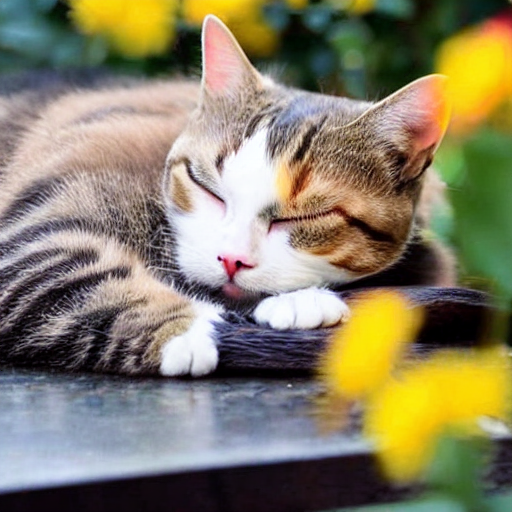

In [3]:
# adding negative prompt
generator = torch.Generator("cuda").manual_seed(666)

prompt = "a sleeping cat having fun in garden."
image = pipe(prompt, generator=generator, negative_prompt="grass", guidance_scale=8.5).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"garden_without_grass.png")
image